# Image Edge Detection - Scharr and Canny Operators

This notebook processes all JPG images in a folder using Scharr and Canny edge detection operators.

## 1. Import Required Libraries

In [1]:
import cv2
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt

# Set matplotlib to display images properly
plt.rcParams['figure.figsize'] = (12, 8)

## 2. Set Input and Output Paths

In [2]:
# Input folder path (folder containing JPG images)
input_folder = 'images'  # Change this to your input folder path

# Output folder paths
output_folder_scharr = 'haixin_output_scharr'
output_folder_canny = 'haixin_output_canny'

# Create output folders
os.makedirs(output_folder_scharr, exist_ok=True)
os.makedirs(output_folder_canny, exist_ok=True)

print(f"Input folder: {input_folder}")
print(f"Scharr output folder: {output_folder_scharr}")
print(f"Canny output folder: {output_folder_canny}")

Input folder: images
Scharr output folder: haixin_output_scharr
Canny output folder: haixin_output_canny


## 3. Define Edge Detection Functions

In [3]:
def apply_scharr(image):
    """
    Apply Scharr operator for edge detection
    
    Args:
        image: Input image
    
    Returns:
        Edge-detected image
    """
    # Convert to grayscale
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    
    # Apply Scharr operator (x and y directions)
    scharr_x = cv2.Scharr(gray, cv2.CV_64F, 1, 0)
    scharr_y = cv2.Scharr(gray, cv2.CV_64F, 0, 1)
    
    # Calculate gradient magnitude
    scharr_x = cv2.convertScaleAbs(scharr_x)
    scharr_y = cv2.convertScaleAbs(scharr_y)
    scharr = cv2.addWeighted(scharr_x, 0.5, scharr_y, 0.5, 0)
    
    return scharr


def apply_canny(image, threshold1=50, threshold2=150):
    """
    Apply Canny operator for edge detection
    
    Args:
        image: Input image
        threshold1: First threshold (low threshold)
        threshold2: Second threshold (high threshold)
    
    Returns:
        Edge-detected image
    """
    # Convert to grayscale
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    
    # Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 1.4)
    
    # Apply Canny operator
    canny = cv2.Canny(blurred, threshold1, threshold2)
    
    return canny

## 4. Batch Process Images

In [4]:
# Get all JPG files
jpg_files = list(Path(input_folder).glob('*.jpg')) + list(Path(input_folder).glob('*.JPG'))

print(f"Found {len(jpg_files)} JPG files")
print("\nStarting processing...\n")

# Process each image file
for i, img_path in enumerate(jpg_files, 1):
    try:
        # Read image
        image = cv2.imread(str(img_path))
        
        if image is None:
            print(f"[{i}/{len(jpg_files)}] Cannot read: {img_path.name}")
            continue
        
        # Apply Scharr operator
        scharr_result = apply_scharr(image)
        scharr_output_path = os.path.join(output_folder_scharr, img_path.name)
        cv2.imwrite(scharr_output_path, scharr_result)
        
        # Apply Canny operator
        canny_result = apply_canny(image)
        canny_output_path = os.path.join(output_folder_canny, img_path.name)
        cv2.imwrite(canny_output_path, canny_result)
        
        print(f"[{i}/{len(jpg_files)}] Processed: {img_path.name}")
        
    except Exception as e:
        print(f"[{i}/{len(jpg_files)}] Error processing {img_path.name}: {str(e)}")

print("\nAll images processed successfully!")

Found 101 JPG files

Starting processing...

[1/101] Processed: IMG_1862.jpg
[2/101] Processed: IMG_1865.jpg
[3/101] Processed: IMG_1901.jpg
[4/101] Processed: IMG_1859.jpg
[5/101] Processed: IMG_1906.jpg
[6/101] Processed: IMG_1908.jpg
[7/101] Processed: IMG_1881.jpg
[8/101] Processed: IMG_1850.jpg
[9/101] Processed: IMG_1851 (1).jpg
[10/101] Processed: IMG_1886.jpg
[11/101] Processed: IMG_1857.jpg
[12/101] Processed: IMG_1855 (1).jpg
[13/101] Processed: IMG_1846.jpg
[14/101] Processed: IMG_1897.jpg
[15/101] Processed: IMG_1893 (1).jpg
[16/101] Processed: IMG_1897 (1).jpg
[17/101] Processed: IMG_1841.jpg
[18/101] Processed: IMG_1890.jpg
[19/101] Processed: IMG_1919.jpg
[20/101] Processed: IMG_1833.jpg
[21/101] Processed: IMG_1917.jpg
[22/101] Processed: IMG_1848.jpg
[23/101] Processed: IMG_1899.jpg
[24/101] Processed: IMG_1910.jpg
[25/101] Processed: IMG_1848 (1).jpg
[26/101] Processed: IMG_1834.jpg
[27/101] Processed: IMG_1887.jpg
[28/101] Processed: IMG_1856.jpg
[29/101] Processed: 

## 5. Visualization Comparison (Optional)

Display comparison results for the first image

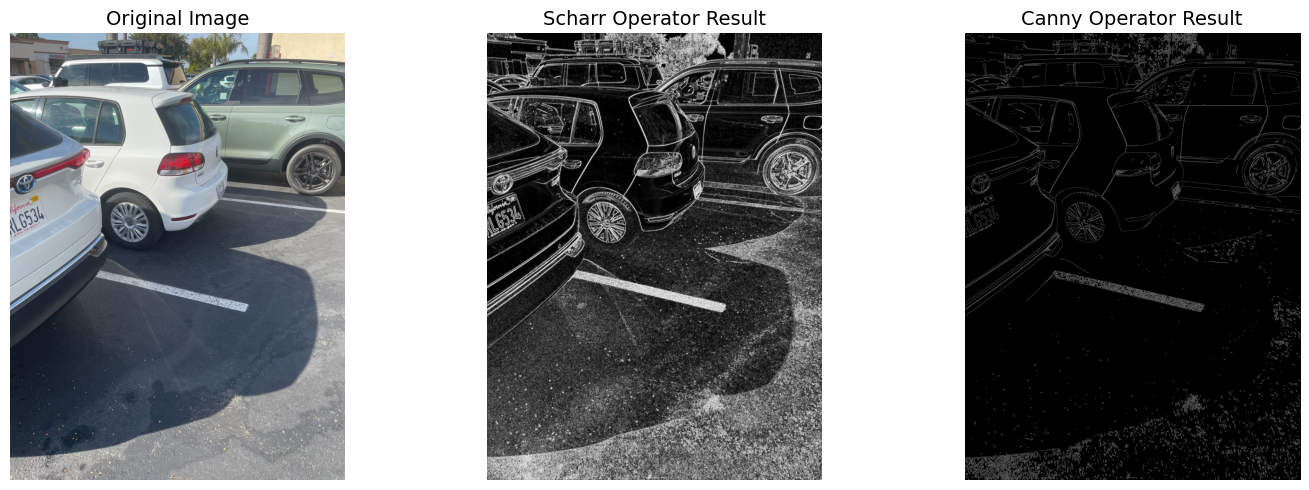


Sample image: IMG_1862.jpg


In [5]:
if len(jpg_files) > 0:
    # Read the first image
    sample_img_path = jpg_files[0]
    sample_image = cv2.imread(str(sample_img_path))
    sample_image_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    
    # Apply both operators
    scharr_result = apply_scharr(sample_image)
    canny_result = apply_canny(sample_image)
    
    # Visualize
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].imshow(sample_image_rgb)
    axes[0].set_title('Original Image', fontsize=14)
    axes[0].axis('off')
    
    axes[1].imshow(scharr_result, cmap='gray')
    axes[1].set_title('Scharr Operator Result', fontsize=14)
    axes[1].axis('off')
    
    axes[2].imshow(canny_result, cmap='gray')
    axes[2].set_title('Canny Operator Result', fontsize=14)
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nSample image: {sample_img_path.name}")
else:
    print("No image files found for visualization")

## 6. Adjust Canny Parameters (Optional)

If Canny results are not ideal, you can adjust threshold parameters and reprocess

In [6]:
# Custom Canny thresholds
custom_threshold1 = 30   # Low threshold
custom_threshold2 = 100  # High threshold

# Create new output folder
output_folder_canny_custom = 'output_canny_custom'
os.makedirs(output_folder_canny_custom, exist_ok=True)

print(f"Reprocessing with custom thresholds: threshold1={custom_threshold1}, threshold2={custom_threshold2}\n")

for i, img_path in enumerate(jpg_files, 1):
    try:
        image = cv2.imread(str(img_path))
        if image is None:
            continue
        
        canny_result = apply_canny(image, custom_threshold1, custom_threshold2)
        output_path = os.path.join(output_folder_canny_custom, img_path.name)
        cv2.imwrite(output_path, canny_result)
        
        print(f"[{i}/{len(jpg_files)}] Processed: {img_path.name}")
    except Exception as e:
        print(f"[{i}/{len(jpg_files)}] Error processing: {str(e)}")

print("\nCustom parameter processing complete!")

Reprocessing with custom thresholds: threshold1=30, threshold2=100

[1/101] Processed: IMG_1862.jpg
[2/101] Processed: IMG_1865.jpg
[3/101] Processed: IMG_1901.jpg
[4/101] Processed: IMG_1859.jpg
[5/101] Processed: IMG_1906.jpg
[6/101] Processed: IMG_1908.jpg
[7/101] Processed: IMG_1881.jpg
[8/101] Processed: IMG_1850.jpg
[9/101] Processed: IMG_1851 (1).jpg
[10/101] Processed: IMG_1886.jpg
[11/101] Processed: IMG_1857.jpg
[12/101] Processed: IMG_1855 (1).jpg
[13/101] Processed: IMG_1846.jpg
[14/101] Processed: IMG_1897.jpg
[15/101] Processed: IMG_1893 (1).jpg
[16/101] Processed: IMG_1897 (1).jpg
[17/101] Processed: IMG_1841.jpg
[18/101] Processed: IMG_1890.jpg
[19/101] Processed: IMG_1919.jpg
[20/101] Processed: IMG_1833.jpg
[21/101] Processed: IMG_1917.jpg
[22/101] Processed: IMG_1848.jpg
[23/101] Processed: IMG_1899.jpg
[24/101] Processed: IMG_1910.jpg
[25/101] Processed: IMG_1848 (1).jpg
[26/101] Processed: IMG_1834.jpg
[27/101] Processed: IMG_1887.jpg
[28/101] Processed: IMG_1856.j